Итоговое Домашнее задание

Дисциплина: Временные ряды

Преподаватель: Горяинова Елена Рудольфовна

Выполнила: Курманова Карина (Вариант 17)

Условие: 
    Построение вероятностной модели (реального/смоделированного) временного ряда
1. Используя процедуру Доладо-Дженкинса-Сосвилла -Риверо, выяснить, относится ли наблюдаемый ряд к типу TSP.
2. Для ряда типа TSP оценить по МНК детерминированную составляющую ряда.
3. Детрендировать ряд.
4. Провести идентификацию случайной составляющей ряда, выбрав в качестве базовых 2-3 подходящие модели.
5. Оценить параметры выбранных моделей.
6. Используя информационные критерии Акаике и Шварца, выбрать адекватную модель.
7. Провести диагностику остатков.
8. Построить прогноз на один шаг.
В каждом варианте даны реализации временного ряда X(t), t=1,…,200.

Примечание: Временная компонента t была опущена, так как она одинакова для всех вариантов (t=1,…,200 с шагом 1)

Вариант 17
13.6000,10.2000,-14.1751,-0.8715,27.1948,10.1143,-16.1917,-27.3488,27.7015,-9.5925,-83.5035,28.1297,-67.8710,10.8160,-22.2229,-74.0771,-8.4892,-23.4594,-60.0915,-84.3887,-26.3018,-30.3431,-81.1034,-53.9505,-109.2477,-21.0008,-104.7533,-78.9396,-35.0121,-147.4410,-81.1893,-43.9765,-166.1623,-60.8554,-104.8405,-107.4257,-68.9338,-147.9654,-41.4088,-167.3175,-70.9626,-110.4575,-151.8318,-146.5711,-106.5570,-126.9340,-185.7489,-122.9015,-105.0625,-203.3463,-175.6587,-124.2067,-159.6477,-175.8238,-165.0960,-158.3819,-199.8681,-194.7620,-227.2796,-147.9337,-216.9691,-182.3630,-183.0005,-197.5355,-192.9934,-201.7662,-195.5214,-215.2149,-194.7404,-215.5875,-216.7592,-242.9199,-254.4946,-272.0769,-194.2692,-248.1236,-247.9027,-248.7472,-286.0040,-262.6341,-184.0373,-292.9731,-299.8678,-239.5495,-253.9324,-253.3946,-269.0672,-286.3067,-325.9701,-248.8712,-304.2552,-262.5958,-364.6913,-259.2025,-270.9242,-323.5510,-337.4489,-313.9556,-274.9694,-389.0693,-287.1924,-384.8553,-323.4130,-353.4747,-278.1350,-348.6372,-276.2828,-358.9712,-343.9025,-375.2433,-391.8756,-311.5914,-357.4469,-379.1922,-369.5224,-333.7817,-388.7057,-425.6010,-363.3262,-396.8649,-352.9299,-403.8899,-444.7206,-397.9763,-405.0880,-447.0289,-381.2874,-448.7325,-400.0490,-414.1552,-434.4021,-436.5652,-421.6177,-428.2314,-488.0111,-429.6883,-476.0622,-459.7284,-427.7345,-475.0582,-495.8924,-477.7594,-448.4115,-491.3380,-486.4141,-453.6902,-550.5880,-418.7877,-557.3137,-452.4659,-485.9409,-508.9844,-479.6435,-516.4283,-516.6942,-528.3286,-510.3382,-494.5679,-548.0113,-537.9949,-525.5917,-501.5727,-528.1017,-567.9137,-514.9793,-553.0444,-582.2731,-549.1069,-574.0883,-581.6710,-489.4276,-554.6114,-621.7472,-523.1808,-624.1422,-578.0582,-582.5439,-639.6581,-594.5779,-583.5517,-549.2685,-629.2012,-619.2475,-599.3209,-571.0511,-642.3580,-595.0595,-654.5903,-632.7485,-574.2919,-645.8692,-641.0167,-599.5081,-657.8969,-677.0306,-607.7307,-681.5877,-681.8842,-675.5012,-631.1399

In [40]:
#загружаем необходимые нам для работы следующие библиотеки Python:
import numpy as np
#перед примением была изучена следующая документация, см. ссылку - https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
#мпортируем тест Дики-Фуллера из стат.пакета
from statsmodels.tsa.stattools import adfuller 
#импортируем методы для изображения графиков АКФ, ЧАКФ 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas import Series # следующие библиотеки нужны для работы с данными
import math 
import pylab
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm, colors
import random
#для использования метода наименьших квадратов
from scipy import optimize
import pandas as pd
#для использования моделей ARMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.api as smt
#для теста на нормальное распределение 
from scipy import stats

1)Определяем, является относится ли наблюдаемый ряд к типу TSP - Trend Stationary Process (In the statistical analysis of time series, a stochastic process is trend stationary if an underlying trend can be removed, leaving a stationary process): 

In [2]:
#читаем данные
timeseries =[ 13.6000,10.2000,-14.1751,-0.8715,27.1948,10.1143,-16.1917,-27.3488,27.7015,-9.5925,-83.5035,28.1297,-67.8710,10.8160,-22.2229,-74.0771,-8.4892,-23.4594,-60.0915,-84.3887,-26.3018,-30.3431,-81.1034,-53.9505,-109.2477,-21.0008,-104.7533,-78.9396,-35.0121,-147.4410,-81.1893,-43.9765,-166.1623,-60.8554,-104.8405,-107.4257,-68.9338,-147.9654,-41.4088,-167.3175,-70.9626,-110.4575,-151.8318,-146.5711,-106.5570,-126.9340,-185.7489,-122.9015,-105.0625,-203.3463,-175.6587,-124.2067,-159.6477,-175.8238,-165.0960,-158.3819,-199.8681,-194.7620,-227.2796,-147.9337,-216.9691,-182.3630,-183.0005,-197.5355,-192.9934,-201.7662,-195.5214,-215.2149,-194.7404,-215.5875,-216.7592,-242.9199,-254.4946,-272.0769,-194.2692,-248.1236,-247.9027,-248.7472,-286.0040,-262.6341,-184.0373,-292.9731,-299.8678,-239.5495,-253.9324,-253.3946,-269.0672,-286.3067,-325.9701,-248.8712,-304.2552,-262.5958,-364.6913,-259.2025,-270.9242,-323.5510,-337.4489,-313.9556,-274.9694,-389.0693,-287.1924,-384.8553,-323.4130,-353.4747,-278.1350,-348.6372,-276.2828,-358.9712,-343.9025,-375.2433,-391.8756,-311.5914,-357.4469,-379.1922,-369.5224,-333.7817,-388.7057,-425.6010,-363.3262,-396.8649,-352.9299,-403.8899,-444.7206,-397.9763,-405.0880,-447.0289,-381.2874,-448.7325,-400.0490,-414.1552,-434.4021,-436.5652,-421.6177,-428.2314,-488.0111,-429.6883,-476.0622,-459.7284,-427.7345,-475.0582,-495.8924,-477.7594,-448.4115,-491.3380,-486.4141,-453.6902,-550.5880,-418.7877,-557.3137,-452.4659,-485.9409,-508.9844,-479.6435,-516.4283,-516.6942,-528.3286,-510.3382,-494.5679,-548.0113,-537.9949,-525.5917,-501.5727,-528.1017,-567.9137,-514.9793,-553.0444,-582.2731,-549.1069,-574.0883,-581.6710,-489.4276,-554.6114,-621.7472,-523.1808,-624.1422,-578.0582,-582.5439,-639.6581,-594.5779,-583.5517,-549.2685,-629.2012,-619.2475,-599.3209,-571.0511,-642.3580,-595.0595,-654.5903,-632.7485,-574.2919,-645.8692,-641.0167,-599.5081,-657.8969,-677.0306,-607.7307,-681.5877,-681.8842,-675.5012,-631.1399]
print(len(timeseries)) #длина ряда
times = [] #временная компонента t=1..200
for i in range(200):
    times.append(float(i+1))
    


200


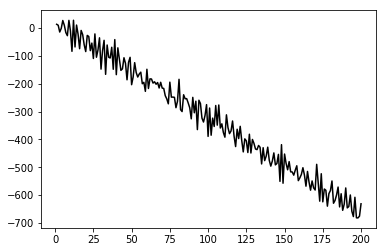

In [3]:
#рисуем график временного ряда, прослеживаем нисходящую линейную тенденцию
plt.plot(times, timeseries, '-', color = 'k')

По графику реализации временного ряда прослеживается некоторый линейный тренд. 

Применим тест Дики-Фуллера для того, чтобы проанализировать, относится ли данный ряд к типу TSP.
- Нулевая гипотеза: существует единичный корень, ряд нестационарный.
- Альтернативная гипотеза: единичного корня нет, ряд стационарный.

Распределение статистики теста называется распределением Дики-Фуллера.

In [4]:
#применение теста
result = adfuller(timeseries)
print('ADF Statistic: %f' % result[0]) 
print('Critical Values:') #критические значения
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.008484
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


- Значение статистики не входит в критическую область, следовательно, нулевая гипотеза не может быть отвергнута. 
Ответ: ряд относится к типу TSP.

Решение пункта № 2. ряда типа TSP оценить по МНК детерминированную составляющую ряда
Пусть детерминированная компонента ряда есть функция f(t) = f(t,a,b), где a, b - неизвестные параметры. 
f(t)=a+bt, функция является линейной. Метод наименьших квадратов основывается на минимизации следующей функции:

$$ \sum_{i=1}^{200} ( X_i - f(t, a, b))^{2} \rightarrow min_{ab} $$

In [5]:
def func(params, xdata, ydata):
    return (ydata - np.dot(xdata, params))

onesarray = np.ones(200)
xdata = np.transpose(np.array([onesarray, times]))

In [6]:
print(optimize.leastsq(func, [1.0, 1.0], args=(xdata, timeseries))) #параметры a,b

(array([19.52723336, -3.41533031]), 3)


In [7]:
a = 19.52723336
b = -3.41533031

In [8]:
line = []
for i in range(200):
    line.append(a+b*times[i])

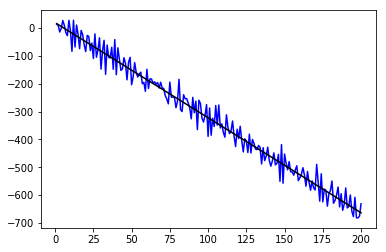

In [9]:
#изобразим полученную тенденцию
timesfloat = np.array(times, dtype = float)

plt.plot(times, timeseries, '-', color = 'b')
plt.plot(times, line, '-', color = 'k')

Подставляем найденные значения:

f(t)=19.52723336+-3.41533031t

Решение пункта 3: Детрендировать ряд
$$ X_t= m_t + y_t $$ 
$$ m_t - детерминированная \space составляющая  \spaceряда $$
$$ y_t - случайная\space составляющая \space ряда $$
Детрендирование ряда: 
$$ y_t = X_t - m_t$$

In [10]:
detrended = [timeseries[i]-line[i] for i in range(0, 200)]

Text(0.5, 1.0, 'График детендированного процесса ')

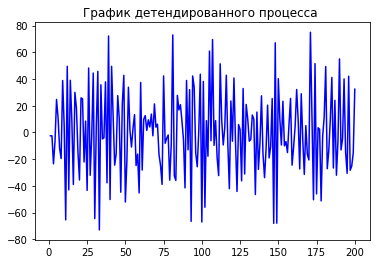

In [11]:
plt.plot(times, detrended, '-', color = 'b')
plt.title("График детендированного процесса ")

Используем снова тест Дики-Фуллера для определения, является ли детрендированный ряд стационарным. 
Гипотезы те же, что и были расписаны ранее. 

In [12]:
result1 = adfuller(detrended)
print('ADF Statistic: %f' % result1[0])
print('Critical Values:')
for key, value in result1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.080401
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


Значение статистики входит в критическую область.  Нулевая гипотеза отвергается. Ряд стационарный. 

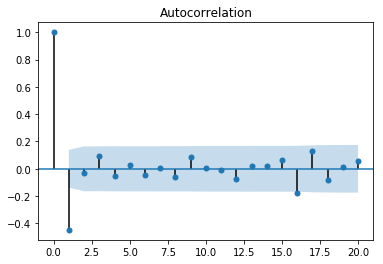

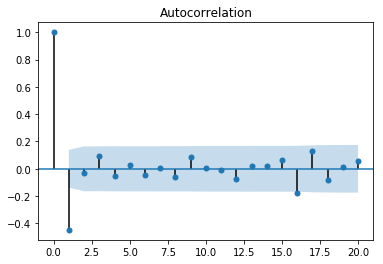

In [13]:
plot_acf(detrended,lags=20)

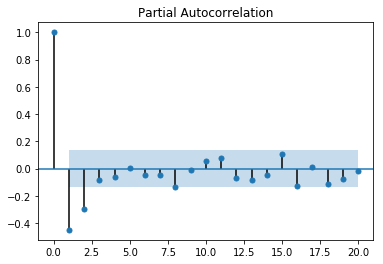

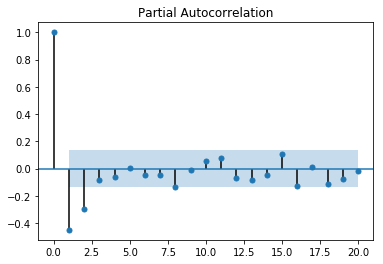

In [14]:
plot_pacf(detrended,lags=20)


4. Провести идентификацию случайной составляющей ряда, выбрав в качестве базовых 2-3 подходящие модели.
5. Оценить параметры выбранных моделей.
6. Используя информационные критерии Акаике и Шварца, выбрать адекватную модель.

Автокорреляционная функция и частично автокорреляционная функция 
На графике автокорреляционной функции видно, что есть значимый лаг1. Это значит, что один из подходящих вариантов - модель MA(1). Рассмотрим также подходящие модели AR(2) и ARMA(1,1).

MA(1).

In [27]:
mdl = smt.ARMA(detrended, order=(0, 1)).fit()
print("Параметры модели :")
print(mdl.maparams)
print("AIC = ", mdl.aic)
print("BIC = ", mdl.bic)

Параметры модели :
[-0.59339813]
AIC =  1889.434104887891
BIC =  1899.329056987535


AR(2).

In [28]:
mdl1 = smt.ARMA(detrended, order=(2, 0)).fit()
print("Параметры модели :")
print(mdl1.arparams)
print("AIC = ", mdl1.aic)
print("BIC = ", mdl1.bic)

Параметры модели :
[-0.57920711 -0.29212254]
AIC =  1892.0257050276111
BIC =  1905.2189744938032


ARMA(1, 1)

In [29]:
mdl2 = smt.ARMA(detrended, order=(1, 1)).fit()
print("Параметры модели :")
print(mdl2.arparams, mdl.maparams)
print("AIC = ", mdl2.aic)
print("BIC = ", mdl2.bic)

Параметры модели :
[-0.05194862] [-0.59339813]
AIC =  1891.2556492844126
BIC =  1904.4489187506047


Чем ниже информационный критерий (AIC и BIC), тем лучше модель. Среди данных моделей, наименьшие значения имеет информационных критериев имеет модель MA(1).

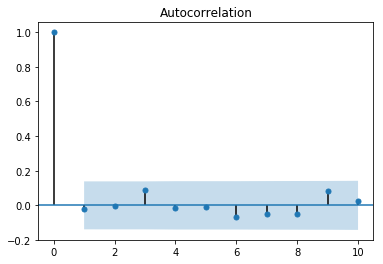

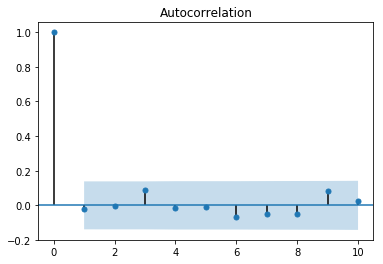

In [34]:
plot_acf(mdl.resid,lags=10)

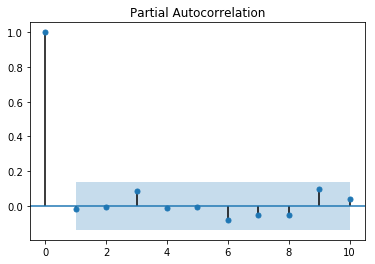

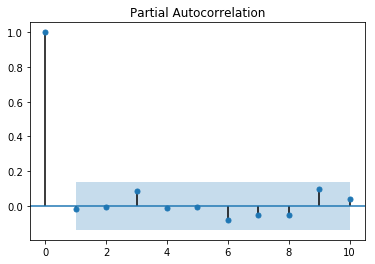

In [35]:
plot_pacf(mdl.resid,lags=10)

По графику АКФ и ЧАКФ модели MA(1)  видно, что больше значимых лагов, кроме нулевого, нет. 

Проверим, являются ли остатки выбранной модели нормально распределенными.
Нулевая гипотеза: Остатки имеют нормальное распределение. 
Альтернативная гипотеза: распределение остатков не является нормальным. 

In [42]:
stats.normaltest(mdl.resid)

NormaltestResult(statistic=1.4319793877279692, pvalue=0.48870820086631517)

При выборе уровня значимости 5%, p-value больше, поэтому нулевая гипотеза не отвергается. 
Значит, остатки модели имеют нормальное распределение. 

8. Построить прогноз на один шаг. 

In [54]:
predict = mdl.forecast()[0]


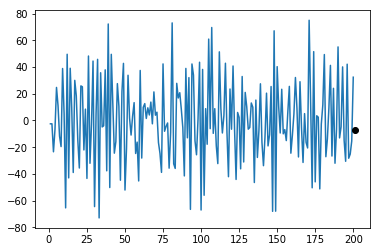

In [50]:
plt.plot(times, detrended)
plt.plot([201], predict, 'o', c='k')

In [51]:
toorigin = predict + a + b*201

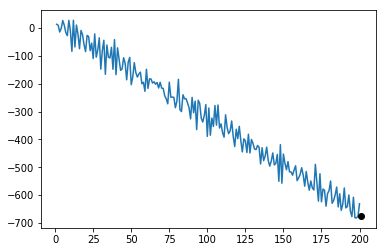

In [52]:
plt.plot(times, timeseries)
plt.plot([201], toorigin, 'o', c='k')

На графиках черной точкой отмечено предсказанное значение. 